<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/FCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import h5py
import sys
import numpy as np

In [3]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data de la universidad coreana

In [4]:
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/features_y"
with h5py.File(path_features, 'r') as hf:
    x_features = hf['features_y'][:]

In [5]:
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/y_targets"
with h5py.File(path_features, 'r') as hf:
    y_targets = hf['y_targets'][:]

### Data from case west reserve university

In [6]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_1/features"
with h5py.File(path_features, 'r') as hf:
    x_features_1 = hf['features'][:]


In [7]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_1/targets"
with h5py.File(path_features, 'r') as hf:
    y_targets_1 = hf['targets'][:]

In [8]:
y_targets_1.shape

(104, 1)

### creacion de los sets

In [19]:

x_shape = x_features.shape[0]
train_ratio = 0.8  # 80% for training
val_ratio = 0.2   # 20% for validation (no test set)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_features, y_targets, test_size=val_ratio, random_state=42)

# Now, x_train, y_train, x_val, and y_val contain the data and labels for training and validation.

# Shuffle the rows (optional, you can remove this if not needed)
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]

In [20]:
x_test, y_test= x_features_1, y_targets_1


Epoch 1/1000
3/3 - 2s - loss: 1.2540 - accuracy: 0.4769 - false_negatives: 20.0000 - false_positives: 14.0000 - val_loss: 1.2382 - val_accuracy: 0.5882 - val_false_negatives: 2.0000 - val_false_positives: 5.0000 - 2s/epoch - 797ms/step
Epoch 2/1000
3/3 - 0s - loss: 1.2312 - accuracy: 0.6615 - false_negatives: 6.0000 - false_positives: 16.0000 - val_loss: 1.2251 - val_accuracy: 0.5882 - val_false_negatives: 2.0000 - val_false_positives: 5.0000 - 52ms/epoch - 17ms/step
Epoch 3/1000
3/3 - 0s - loss: 1.2177 - accuracy: 0.6769 - false_negatives: 5.0000 - false_positives: 16.0000 - val_loss: 1.2091 - val_accuracy: 0.5882 - val_false_negatives: 2.0000 - val_false_positives: 5.0000 - 49ms/epoch - 16ms/step
Epoch 4/1000
3/3 - 0s - loss: 1.2031 - accuracy: 0.6615 - false_negatives: 5.0000 - false_positives: 17.0000 - val_loss: 1.1940 - val_accuracy: 0.7059 - val_false_negatives: 0.0000e+00 - val_false_positives: 5.0000 - 65ms/epoch - 22ms/step
Epoch 5/1000
3/3 - 0s - loss: 1.1868 - accuracy: 0.7

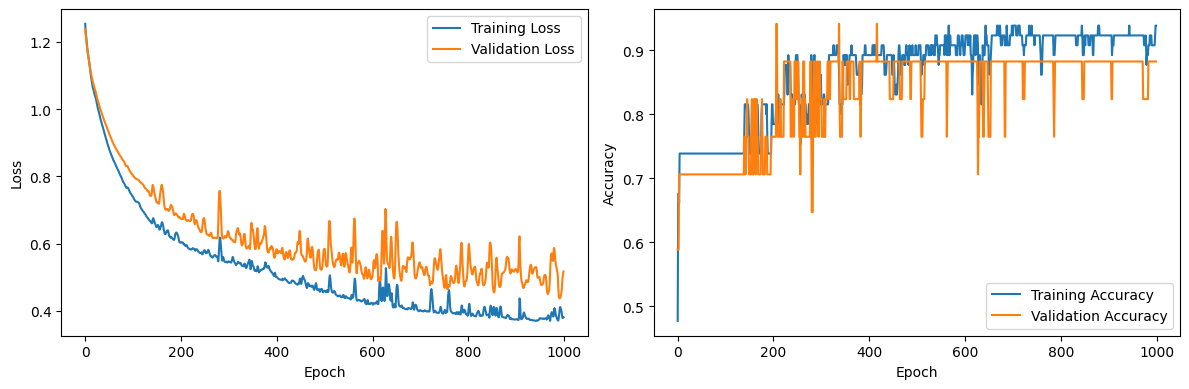

4/4 [==============================] - 0s 5ms/step - loss: 0.3413 - accuracy: 0.9327 - false_negatives: 2.0000 - false_positives: 5.0000
Test Loss: 0.3413
Test Accuracy: 93.27%
False Negatives: 2
False Positives: 5
4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 3  5]
 [ 2 94]]


In [23]:

# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

### Red entrenada con todos los datos

In [15]:
###3 concateno todo
y_targets = y_targets.reshape(len(y_targets), 1)
x_features_3=np.concatenate((x_features ,x_features_1 ))
y_targets_3=np.concatenate((y_targets ,y_targets_1 ))



In [14]:
del model

In [16]:
# Assuming x is your dataset with shape (70, 14) and y is your labels
x_shape = x_features.shape[0]
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Split the dataset into a temporary training set and a test set
x_temp, x_test, y_temp, y_test = train_test_split(x_features_3, y_targets_3, test_size=test_ratio, random_state=42)

# Split the temporary dataset into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Now, x_train, y_train, x_val, y_val, x_test, and y_test contain the data and labels for each set

# Shuffle the rows
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))
test_indices = np.random.permutation(len(x_test))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]
x_test, y_test = x_test[test_indices], y_test[test_indices]

Epoch 1/1000
4/4 - 2s - loss: 1.2094 - accuracy: 0.5135 - false_negatives_1: 48.0000 - false_positives_1: 6.0000 - val_loss: 1.1971 - val_accuracy: 0.5405 - val_false_negatives_1: 14.0000 - val_false_positives_1: 3.0000 - 2s/epoch - 478ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.1891 - accuracy: 0.5946 - false_negatives_1: 37.0000 - false_positives_1: 8.0000 - val_loss: 1.1732 - val_accuracy: 0.6486 - val_false_negatives_1: 10.0000 - val_false_positives_1: 3.0000 - 43ms/epoch - 11ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.1687 - accuracy: 0.6396 - false_negatives_1: 25.0000 - false_positives_1: 15.0000 - val_loss: 1.1480 - val_accuracy: 0.7838 - val_false_negatives_1: 4.0000 - val_false_positives_1: 4.0000 - 58ms/epoch - 14ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.1468 - accuracy: 0.7477 - false_negatives_1: 9.0000 - false_positives_1: 19.0000 - val_loss: 1.1207 - val_accuracy: 0.8649 - val_false_negatives_1: 1.0000 - val_false_positives_1: 4.0000 - 47ms/epoch - 12ms/step
Epoch 5/1000
4/4 - 0s 

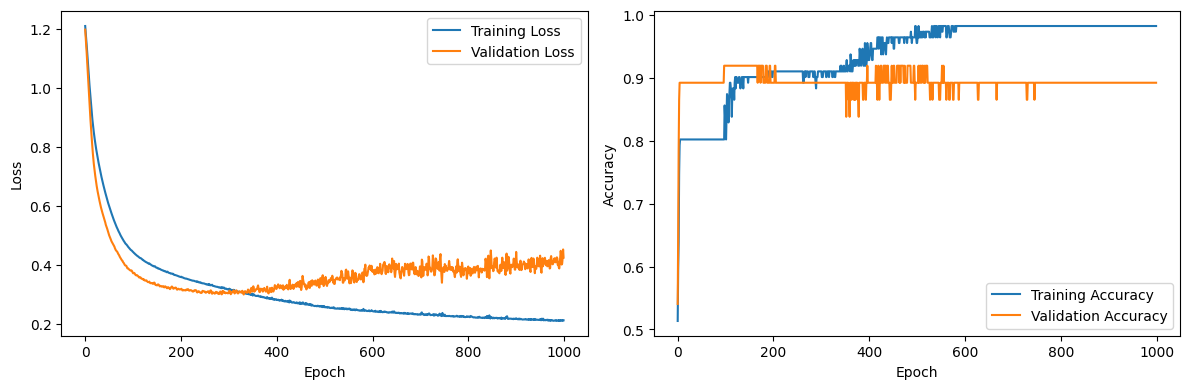

2/2 [==============================] - 0s 14ms/step - loss: 0.4256 - accuracy: 0.8947 - false_negatives_1: 3.0000 - false_positives_1: 1.0000
Test Loss: 0.4256
Test Accuracy: 89.47%
False Negatives: 3
False Positives: 1
2/2 [==============================] - 0s 5ms/step
Confusion Matrix:
[[ 3  1]
 [ 3 31]]


In [18]:

### need to add some dropeout
# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)